In [1]:
!pip install contrastive
from contrastive import CPCA


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install ucimlrepo


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dry_bean_dataset = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean_dataset.data.features 
y = dry_bean_dataset.data.targets 
  
# metadata 
print(dry_bean_dataset.metadata) 
  
# variable information 
print(dry_bean_dataset.variables) 

{'uci_id': 602, 'name': 'Dry Bean Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and El

In [4]:
print(X.shape)

(13611, 16)


In [6]:
df_targets[~df_targets.Class.isin(["SEKER", "SIRA"])]

NameError: name 'df_targets' is not defined

In [7]:
import numpy as np
df_features = dry_bean_dataset.data["features"]
df_targets = dry_bean_dataset.data["targets"]
seker_features = df_features[df_targets["Class"]=="SEKER"]
sira_features = df_features[df_targets["Class"]=="SIRA"]
background_features = df_features[~df_targets["Class"].isin(["SEKER", "SIRA"])]
# cali_features = df_features[df_targets["Class"]=="CALI"] # add the other classes as background noise
X_data = np.concatenate((seker_features.values, sira_features.values), axis=0)
X_data_noise = background_features

## TODO
# Choose 2 random classes as binary classification
# Background: either 1 of 5, (or all 5)
# Contrastive background: keep as beans for the moment -> redo this 
# cPCA: background noise is all the rest: cPCA only for 

## Another approach
# Background could be all 7 classes (noisy), but only a subset of beans are in the target class
# Background could also be unlabelled data
# Validating different background configurations (i.e. normal noise, related background (+ different indexing configurations))
# Implement k-fold validation

# PCA applications -> limited, notably to bioinformatics + financial, + visualization
# Quantify when it works -> use the backgrounds approach

In [8]:
print(X_data.shape)
print(X_data_noise.shape)

(4663, 16)
(8948, 16)


In [15]:
seker_features.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [14]:
sira_features.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
7429,31519,676.641,255.073562,157.802740,1.616408,0.785662,32065,200.327824,0.758033,0.982972,0.865099,0.785373,0.008093,0.001899,0.616810,0.997017
7430,31751,671.914,244.102719,168.522491,1.448487,0.723451,32462,201.063743,0.694284,0.978097,0.883771,0.823685,0.007688,0.002183,0.678457,0.982736
7431,32857,668.106,233.804968,179.500919,1.302528,0.640764,33185,204.535649,0.775569,0.990116,0.925011,0.874813,0.007116,0.002571,0.765298,0.996822
7432,33180,670.488,240.969501,175.645040,1.371912,0.684610,33564,205.538532,0.774835,0.988559,0.927479,0.852965,0.007262,0.002371,0.727549,0.998133
7433,33206,680.423,260.089827,163.102720,1.594638,0.778938,33583,205.619047,0.752663,0.988774,0.901298,0.790569,0.007833,0.001887,0.625000,0.996649


In [13]:
cali_features.head()

NameError: name 'cali_features' is not defined

In [12]:
import numpy as np
y_data = np.zeros(len(seker_features)+len(sira_features))

In [ ]:
for i in range(len(seker_features)):
    y_data[i]=1.0

In [16]:
cpca_model = CPCA(n_components=2)
transformed_data = cpca_model.fit_transform(X_data, X_data_noise)
transformed_data = np.asarray(transformed_data)
print(transformed_data.shape)

(4, 4663, 2)


In [17]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
X_data_original_compress = pca_model.fit_transform(X_data)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

mean_acc = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_data_original_compress, y_data, shuffle=True)
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    knn_clf.fit(X_train, y_train)
    mean_acc.append(knn_clf.score(X_test, y_test))
print(f"{round(np.mean(mean_acc),5)} +/- {round(np.std(mean_acc),5)}")

1.0 +/- 0.0


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

for i in range(len(transformed_data)):
    mean_acc = []
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(transformed_data[i], y_data, shuffle=True)
        knn_clf = KNeighborsClassifier(n_neighbors=5)
        knn_clf.fit(X_train, y_train)
        mean_acc.append(knn_clf.score(X_test, y_test))
    print(f"{round(np.mean(mean_acc),5)} +/- {round(np.std(mean_acc),5)}")

1.0 +/- 0.0
1.0 +/- 0.0
1.0 +/- 0.0
1.0 +/- 0.0


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

mean_acc = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, shuffle=True)
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    knn_clf.fit(X_train, y_train)
    mean_acc.append(knn_clf.score(X_test, y_test))
print(f"{round(np.mean(mean_acc),5)} +/- {round(np.std(mean_acc),5)}")

1.0 +/- 0.0


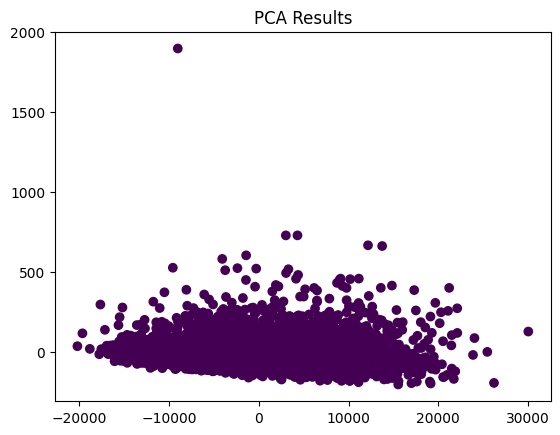

In [21]:
# !pip install matplotlib
import matplotlib.pyplot as plt

plt.scatter(X_data_original_compress[:,0], X_data_original_compress[:,1], c=y_data)
plt.title("PCA Results")
plt.show()

In [22]:
print(transformed_data.shape)
print(y_data.shape)

(4, 4663, 2)
(4663,)


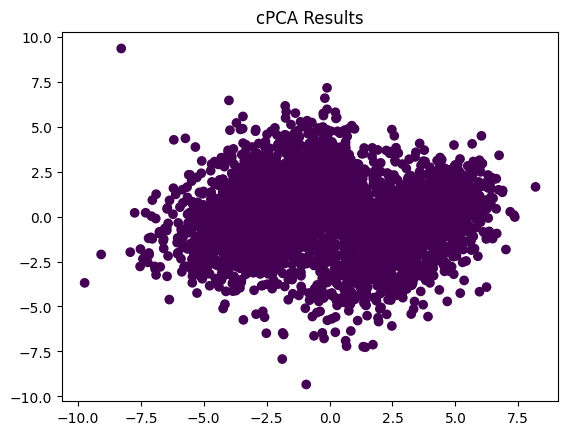

In [23]:
# !pip install matplotlib
import matplotlib.pyplot as plt

plt.scatter(transformed_data[0][:,0], transformed_data[0][:,1], c=y_data)
plt.title("cPCA Results")
plt.show()

### Cycling through All Combinations

In [25]:
import sklearn as sk
from sklearn.model_selection import cross_val_score

reuslts_list = []

# TODO: think of unlabelled beans (noisy samples), other classes being mixed in -> background sample -> ablation study 
# TODO: what is a good background, i.e. beans have different labels - what about noisy samples? - i.e. analysis on the background
# TODO: how to choose a good background, unlabelled dataset?

classes_unique = df_targets["Class"].unique()
for i in range(len(classes_unique)):
    for j in range(len(classes_unique)):
        if i>j:
            tmp_data_dict = dict()
            class_1 = classes_unique[i]
            class_2 = classes_unique[j]
            print(f"{class_1} and {class_2}")
            class_1_features = df_features[df_targets["Class"]==class_1]
            class_2_features = df_features[df_targets["Class"]==class_2]
            background_features = df_features[~df_targets["Class"].isin([class_1, class_2])]
            X_data = np.concatenate((class_1_features.values, class_2_features.values), axis=0)
            X_data_noise = background_features
            y_data = np.zeros(class_1_features.shape[0]+class_2_features.shape[0])
            class_1_indices = list(range(class_1_features.shape[0]))
            y_data[class_1_indices]=1
            X_data, y_data = sk.utils.shuffle(X_data, y_data)
            tmp_data_dict["name"]=f"{class_1} and {class_2}"

            print(f"X_data.shape: {X_data.shape}")
            print(f"X_data_noise.shape: {X_data_noise.shape}")
            if X_data.shape[0] + X_data_noise.shape[0] != df_features.shape[0]:
                raise IndexError("Mismatch between X_data, X_data_shape and df_features")
            
            # PCA processing
            pca_model = PCA(n_components=2)
            X_data_original_compress = pca_model.fit_transform(X_data)
            
            # cPCA preprocessing
            cpca_model = CPCA(n_components=2)
            transformed_data = cpca_model.fit_transform(X_data, X_data_noise)
            transformed_data = np.asarray(transformed_data)
            # print(transformed_data.shape)

            # PCA data
            clf = KNeighborsClassifier(n_neighbors=5)
            scores = cross_val_score(clf, X_data_original_compress, y_data, cv=5)
            print("PCA")
            print(f"Mean: {round(scores.mean(),3)}")
            print(f"Std: {round(scores.std(),3)}")
            print()
            tmp_data_dict["PCA"] = f"{round(scores.mean(),3)} +/- {round(scores.std(),3)}"
            
            # cPCA data
            clf = KNeighborsClassifier(n_neighbors=5)
            scores = cross_val_score(clf, transformed_data[0], y_data, cv=5)
            # pprint(scores)
            print("cPCA (custom alpha 1)")
            print(f"Mean: {round(scores.mean(),3)}")
            print(f"Std: {round(scores.std(),3)}")
            print()
            tmp_data_dict["cPCA-1"] = f"{round(scores.mean(),3)} +/- {round(scores.std(),3)}"

            # cPCA data
            clf = KNeighborsClassifier(n_neighbors=5)
            scores = cross_val_score(clf, transformed_data[1], y_data, cv=5)
            # pprint(scores)
            print("cPCA (custom alpha 2)")
            print(f"Mean: {round(scores.mean(),3)}")
            print(f"Std: {round(scores.std(),3)}")
            print()
            tmp_data_dict["cPCA-2"] = f"{round(scores.mean(),3)} +/- {round(scores.std(),3)}"

            # cPCA data
            clf = KNeighborsClassifier(n_neighbors=5)
            scores = cross_val_score(clf, transformed_data[2], y_data, cv=5)
            # pprint(scores)
            print("cPCA (custom alpha 3)")
            print(f"Mean: {round(scores.mean(),3)}")
            print(f"Std: {round(scores.std(),3)}")
            print()
            tmp_data_dict["cPCA-3"] = f"{round(scores.mean(),3)} +/- {round(scores.std(),3)}"

            # cPCA data
            clf = KNeighborsClassifier(n_neighbors=5)
            scores = cross_val_score(clf, transformed_data[3], y_data, cv=5)
            # pprint(scores)
            print("cPCA (custom alpha 4)")
            print(f"Mean: {round(scores.mean(),3)}")
            print(f"Std: {round(scores.std(),3)}")
            print()
            tmp_data_dict["cPCA-4"] = f"{round(scores.mean(),3)} +/- {round(scores.std(),3)}"

            # on original data
            clf = KNeighborsClassifier(n_neighbors=5)
            scores = cross_val_score(clf, X_data, y_data, cv=5)
            # pprint(scores)
            print("Original data")
            print(f"Mean: {round(scores.mean(),3)}")
            print(f"Std: {round(scores.std(),3)}")
            print()
            print("---")
            tmp_data_dict["original"] = f"{round(scores.mean(),3)} +/- {round(scores.std(),3)}"
            reuslts_list.append(tmp_data_dict)
            # raise KeyError

BARBUNYA and SEKER
X_data.shape: (3349, 16)
X_data_noise.shape: (10262, 16)
PCA
Mean: 0.982
Std: 0.003

cPCA (custom alpha 1)
Mean: 0.985
Std: 0.004

cPCA (custom alpha 2)
Mean: 0.987
Std: 0.004

cPCA (custom alpha 3)
Mean: 0.946
Std: 0.006

cPCA (custom alpha 4)
Mean: 0.878
Std: 0.008

Original data
Mean: 0.982
Std: 0.003

---
BOMBAY and SEKER
X_data.shape: (2549, 16)
X_data_noise.shape: (11062, 16)
PCA
Mean: 1.0
Std: 0.0

cPCA (custom alpha 1)
Mean: 0.999
Std: 0.001

cPCA (custom alpha 2)
Mean: 0.987
Std: 0.004

cPCA (custom alpha 3)
Mean: 0.999
Std: 0.002

cPCA (custom alpha 4)
Mean: 0.971
Std: 0.008

Original data
Mean: 1.0
Std: 0.0

---
BOMBAY and BARBUNYA
X_data.shape: (1844, 16)
X_data_noise.shape: (11767, 16)
PCA
Mean: 0.999
Std: 0.002

cPCA (custom alpha 1)
Mean: 1.0
Std: 0.0

cPCA (custom alpha 2)
Mean: 1.0
Std: 0.0

cPCA (custom alpha 3)
Mean: 1.0
Std: 0.0

cPCA (custom alpha 4)
Mean: 0.999
Std: 0.001

Original data
Mean: 0.999
Std: 0.002

---
CALI and SEKER
X_data.shape: (3

In [37]:
import pandas as pd

def get_acc(x):
    return float(x.split('+/-')[0].strip())

def color_format(s):
    original_acc = get_acc(s['original'])
    print(original_acc)
    # is_max = s == s.max()
    color_list = []
    for i in s:
        print(f'hi: {i}')
        if get_acc(i) <= original_acc:
            color_list.append('background-color: white')
        else:
            color_list.append('background-color: rgb(100,255,100)')
    return color_list


results_df = pd.DataFrame(reuslts_list)
results_df.set_index("name", inplace=True)
results_df.style.apply(color_format, axis=1)

# take original as a baseline, green: positive, red: negative; darker-green, darker-red for more extreme values (for color scaling)
# for breast cancer dataset: take the average of all (average class from all the images, what an average looking thing looks like - the average picture, use that as the mean background)

0.982
hi: 0.982 +/- 0.003
hi: 0.985 +/- 0.004
hi: 0.987 +/- 0.004
hi: 0.946 +/- 0.006
hi: 0.878 +/- 0.008
hi: 0.982 +/- 0.003
1.0
hi: 1.0 +/- 0.0
hi: 0.999 +/- 0.001
hi: 0.987 +/- 0.004
hi: 0.999 +/- 0.002
hi: 0.971 +/- 0.008
hi: 1.0 +/- 0.0
0.999
hi: 0.999 +/- 0.002
hi: 1.0 +/- 0.0
hi: 1.0 +/- 0.0
hi: 1.0 +/- 0.0
hi: 0.999 +/- 0.001
hi: 0.999 +/- 0.002
0.993
hi: 0.993 +/- 0.003
hi: 0.997 +/- 0.001
hi: 0.998 +/- 0.002
hi: 0.995 +/- 0.003
hi: 0.963 +/- 0.004
hi: 0.993 +/- 0.003
0.662
hi: 0.645 +/- 0.01
hi: 0.835 +/- 0.012
hi: 0.932 +/- 0.007
hi: 0.922 +/- 0.01
hi: 0.806 +/- 0.008
hi: 0.662 +/- 0.011
0.999
hi: 0.999 +/- 0.001
hi: 1.0 +/- 0.0
hi: 0.994 +/- 0.002
hi: 1.0 +/- 0.001
hi: 1.0 +/- 0.0
hi: 0.999 +/- 0.001
0.936
hi: 0.911 +/- 0.015
hi: 0.998 +/- 0.002
hi: 0.998 +/- 0.002
hi: 0.997 +/- 0.002
hi: 0.996 +/- 0.002
hi: 0.936 +/- 0.011
0.869
hi: 0.85 +/- 0.015
hi: 0.983 +/- 0.005
hi: 0.986 +/- 0.006
hi: 0.985 +/- 0.002
hi: 0.977 +/- 0.005
hi: 0.869 +/- 0.014
1.0
hi: 1.0 +/- 0.0
hi: 1.0

,PCA,cPCA-1,cPCA-2,cPCA-3,cPCA-4,original
name,,,,,,
BARBUNYA and SEKER,0.982 +/- 0.003,0.985 +/- 0.004,0.987 +/- 0.004,0.946 +/- 0.006,0.878 +/- 0.008,0.982 +/- 0.003
BOMBAY and SEKER,1.0 +/- 0.0,0.999 +/- 0.001,0.987 +/- 0.004,0.999 +/- 0.002,0.971 +/- 0.008,1.0 +/- 0.0
BOMBAY and BARBUNYA,0.999 +/- 0.002,1.0 +/- 0.0,1.0 +/- 0.0,1.0 +/- 0.0,0.999 +/- 0.001,0.999 +/- 0.002
CALI and SEKER,0.993 +/- 0.003,0.997 +/- 0.001,0.998 +/- 0.002,0.995 +/- 0.003,0.963 +/- 0.004,0.993 +/- 0.003
CALI and BARBUNYA,0.645 +/- 0.01,0.835 +/- 0.012,0.932 +/- 0.007,0.922 +/- 0.01,0.806 +/- 0.008,0.662 +/- 0.011
CALI and BOMBAY,0.999 +/- 0.001,1.0 +/- 0.0,0.994 +/- 0.002,1.0 +/- 0.001,1.0 +/- 0.0,0.999 +/- 0.001
HOROZ and SEKER,0.911 +/- 0.015,0.998 +/- 0.002,0.998 +/- 0.002,0.997 +/- 0.002,0.996 +/- 0.002,0.936 +/- 0.011
HOROZ and BARBUNYA,0.85 +/- 0.015,0.983 +/- 0.005,0.986 +/- 0.006,0.985 +/- 0.002,0.977 +/- 0.005,0.869 +/- 0.014
HOROZ and BOMBAY,1.0 +/- 0.0,1.0 +/- 0.0,1.0 +/- 0.0,1.0 +/- 0.0,1.0 +/- 0.0,1.0 +/- 0.0


DERMASON and BOMBAY
X_data.shape: (4068, 16)
X_data_noise.shape: (9543, 16)


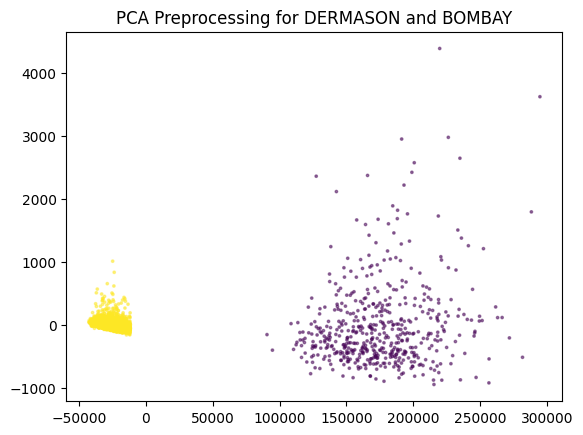

In [134]:
class_1 = "DERMASON"
class_2 = "BOMBAY"
print(f"{class_1} and {class_2}")
class_1_features = df_features[df_targets["Class"]==class_1]
class_2_features = df_features[df_targets["Class"]==class_2]
background_features = df_features[~df_targets["Class"].isin([class_1, class_2])]
X_data = np.concatenate((class_1_features.values, class_2_features.values), axis=0)
X_data_noise = background_features
y_data = np.zeros(class_1_features.shape[0]+class_2_features.shape[0])
class_1_indices = list(range(class_1_features.shape[0]))
y_data[class_1_indices]=1
X_data, y_data = sk.utils.shuffle(X_data, y_data)
tmp_data_dict["name"]=f"{class_1} and {class_2}"

print(f"X_data.shape: {X_data.shape}")
print(f"X_data_noise.shape: {X_data_noise.shape}")
if X_data.shape[0] + X_data_noise.shape[0] != df_features.shape[0]:
    raise IndexError("Mismatch between X_data, X_data_shape and df_features")

# PCA processing
pca_model = PCA(n_components=2)
X_data_original_compress = pca_model.fit_transform(X_data)
plt.title(f"PCA Preprocessing for {class_1} and {class_2}")
plt.scatter(X_data_original_compress[:,0], X_data_original_compress[:,1], c=y_data, alpha=0.5, s=3)
plt.show()